Name: Aqsa Younus,
ERP: 18571,
Dataset type: E-commerce (Dashi Foods)

# Final Project Data Wrangling

- This is the Dashi Foods Dataset. An interesting e-commerce dataset with six data sheets as follows:
    - Customer Ledger
    - Customer
    - Data Dump
    - Items
    - Purchase
    - Customer wise
    

- This ipython file is dedicated to extensive data wrangling of all 6 of these excel sheets in order to extract insights over KPIs and Dimensions

## Objectives of Data Wrangling

- To understand and explore the dataset thoroughly 
- To extract KPIs and Dimensions 
- To clean data for further analysis 
- To illustrate the correlation between columns and sheets 
- To ensure the correct modifications are made in order to extract details that would assist in data analysis

## Assumptions

- I have tried keeping the assumptions as minimal as possible. A lot of research has been put into understanding the business. Explanations are provided in each step. Further elaborations are given in the document attached. 
- I am a person of habit, and I have been following the template that I created for the first data wrangling assignment which is why I did not remove the assumptions part. This part may be updated at any given point of the data wrangling process

# Step 1

- Adding all imports that are deemed necessary for data wrangling

In [249]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import csv
from sklearn.impute import SimpleImputer
import warnings
import statsmodels.api as sm  
from statsmodels.formula.api import ols  
import random as r
from datetime import datetime
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 2 and 3 

- Upload dataset
- Check for missing values
- changing types of the columns
- checking for unique values and other nuances of the dataset
- make data uniform where needed
- checking for data correlation

In [250]:
#uploading csv file
df1 = pd.read_csv (r'C:\Users\Hp\Downloads\Customer_Ledger.csv')
df2 = pd.read_csv (r'C:\Users\Hp\Downloads\Customer.csv')
df3 = pd.read_csv (r'C:\Users\Hp\Downloads\CustomerWise.csv')
df4 = pd.read_csv (r'C:\Users\Hp\Downloads\DataDump4.csv')
df5 = pd.read_csv (r'C:\Users\Hp\Downloads\Item.csv')
df6 = pd.read_csv (r'C:\Users\Hp\Downloads\Purchase.csv')

#checking what kind of columns are we dealing with
df1.head()

,TranNo,TranDate,Remarks,RefNo,RefDate,CustomerID,CustomerTitle,Amount,TranType,TranOrder,DestinationRefNo
0,1819-000135,17/12/2018,NaN,kawish,01/01/1900,1645,kawish jodia,"-7,370.00",Receipt,1,1
1,CCN1819-000047,31/12/2018,opening adjust,NaN,06/02/2019,1645,kawish jodia,"-7,416.00",CrNote,4,1
2,CCN1819-000048,06/02/2019,Purchase white Zeera 40kgs @600/kg approved by...,NaN,06/02/2019,1645,kawish jodia,"-24,000.00",CrNote,4,1
3,1819-000826,08/02/2019,c.white 288pec,NaN,NaN,1645,kawish jodia,"38,760.00",Invoice,4,1
4,CDN1819-000131,12/03/2019,account set,NaN,12/03/2019,1645,kawish jodia,26.00,DrNote,4,1


In [251]:
df2.head()

,CustomerCode,CustomerTitle,DestinationCategoryTitle,DestinationGroupTitle,Email,ContactNumber,MobileNumber,CreditDays,ISRegistered,STRegistrationNo,AccountCode,AccountTitle,NTN,NationalTitle,RegionTitle,TerritoryTitle,TownTitle,ZoneTitle,Active,Address
0,1,kawish jodia,trader,adil,ali.qamber@atlashonda.com.pk,021-32575561,0332-2483905,30,Yes,0,101002001,Account Receivable,3771196-2,None,None,None,karachi,sindh,Yes,"F-36, ESTATE AVENUE, S.I.T.E. KARACHI"
1,2,Bashir & Sons,trader,adnan,mwhaque@atlashonda.com.pk,021-32575561,0333-2196823,30,Yes,0,101002001,Account Receivable,0801063-3,None,None,None,lahore,punjab,Yes,"F-36, ESTATE AVENUE, S.I.T.E. KARACHI"
2,3,Ghulam Abbas jodia,trader,adnan,arslan.amin@atlashitec.com.pk,021-32575561,+92 (333) 3550323,30,Yes,0,101002001,Account Receivable,4040362-9,None,None,None,karachi,sindh,Yes,"F-36, ESTATE AVENUE, S.I.T.E. KARACHI"
3,4,Prawn ckr Sadrudin impres market,trader,adil,None@gmail.com,-,-,30,Yes,0,101002001,Account Receivable,-,None,None,None,karachi,sindh,Yes,None
4,5,Umar ckr,trader,adnan,None@gmail.com,-,-,30,Yes,0,101002001,Account Receivable,-,None,None,None,karachi,sindh,Yes,None


In [252]:
df3.head()

,Transaction ID,Transaction Date,Customer Title,Item ID,Item Title,Unit Title,Quantity,Rate,Gross Amount,Discount Amount,Value Excl Tax,Tax Amount,Net Amount
0,1819-000004,14/12/2018,Haram traders shahfaisal,55.0,HOT AND SOUR SOUP 55 GM,pcs,576.00,50.00,"28,800.00","3,456.00",25344.0,0.0,"25,344.00"
1,1819-000004,14/12/2018,Haram traders shahfaisal,3.0,SEASONING CHICKEN POWDER 18GM,pcs,"5,760.00",12.00,"69,120.00","8,294.40",60825.6,0.0,"60,825.60"
2,1819-000004,14/12/2018,Haram traders shahfaisal,175.0,PAPAD CRACKER BUTTON COLOR 1KG,kg,24.00,160.00,"3,840.00",460.80,3379.2,0.0,"3,379.20"
3,1819-000004,14/12/2018,Haram traders shahfaisal,40.0,PAPAD CRACKER COLOR 1KG,kg,144.00,160.00,"23,040.00","2,764.80",20275.2,0.0,"20,275.20"
4,1819-000004,14/12/2018,Haram traders shahfaisal,6.0,SEASONING CHICKEN POWDER POUCH 1KG,pcs,144.00,400.00,"57,600.00","6,912.00",50688.0,0.0,"50,688.00"


In [254]:
df4.head()

,sync_time,customerId,Customer,area_Id,Area,town_id,Town,City_id,City,ZoneId,...,amount,Rate,employeeId,employeeName,distributorId,distributorName,ProductBrandId,BrandName,ProductCategoryId,ProductCategoryName
0,11/30/2021 16:39,51278,Baba Oil Shop,3229,FATIMA JINNAH COLONY,113,Karachi,129,Karachi,1,...,624.00,13.00,545,Muzzamil,93,asad enterprise,66,Dashi,10,retail
1,11/30/2021 16:39,51278,Baba Oil Shop,3229,FATIMA JINNAH COLONY,113,Karachi,129,Karachi,1,...,1680.00,70.00,545,Muzzamil,93,asad enterprise,66,Dashi,10,retail
2,11/30/2021 16:40,51279,Obaid Shop,3229,FATIMA JINNAH COLONY,113,Karachi,129,Karachi,1,...,156.00,13.00,545,Muzzamil,93,asad enterprise,66,Dashi,10,retail
3,11/30/2021 16:40,51279,Obaid Shop,3229,FATIMA JINNAH COLONY,113,Karachi,129,Karachi,1,...,99.96,8.33,545,Muzzamil,93,asad enterprise,68,Funchies,10,retail
4,11/30/2021 16:40,51279,Obaid Shop,3229,FATIMA JINNAH COLONY,113,Karachi,129,Karachi,1,...,99.96,8.33,545,Muzzamil,93,asad enterprise,68,Funchies,10,retail


In [255]:
df5.head()

,ItemRefNo,ItemTitle,CategoryTitle,SupplierTitle,ClassTitle,GroupTitle,TypeTitle,PackagingTitle,UOMTitle,TaxCategoryTitle,...,IsBatchNoAutoGenerate,IsBatchWiseQuantityAsFullDespatchQuantity,IsCustomDuty,NonInventory,Production,Purchase,QC,QCRequired,Sale,TaxBasedOnCustomer
0,187,Scourer 18gm,Scourer,None,scourer,finished goods,none,None,pcs,None,...,No,No,No,No,No,No,No,No,No,No
1,188,Scourer 36gm,Scourer,None,scourer,finished goods,none,None,pcs,None,...,No,No,No,No,No,No,No,No,No,No
2,235,Scourer 20gm,Scourer,None,scourer,finished goods,none,None,pcs,None,...,No,No,No,No,No,No,No,No,No,No
3,408,SCOURER 15GM,Scourer,None,scourer,finished goods,none,None,pcs,None,...,No,No,No,No,No,No,No,No,No,No
4,184,PAPAD TRIANGLE 500GM,cracker,None,3d,finished goods,none,None,pcs,None,...,No,No,No,No,No,No,No,No,No,No


In [256]:
df6.head()

,Transaction ID,Transaction Date,Supplier ID,Supplier Title,Supplier Category,Project ID,Project Title,Currency ID,Currency Title,Type Title,...,DC Date,StockStatus ID,StockStatus Title,Quantity,Rate,Gross Amount,DiscountAmount,SalesTax Rate,SalesTax Amount,Net Amount
0,1819-000001,12/1/2018,118,Sugar Bashir Sugar (SAAD) JODIA,SERVICES,2,None,1,PAK Rupee,sugar,...,12/21/2018,1,None,"1,250.00",52.00,"65,000.00",0.0,0.0,0.00,"65,000.00"
1,1819-000018,12/4/2018,104,Speciality Printers,PACKING MATERIAL,2,None,1,PAK Rupee,soup & ckp,...,12/24/2018,1,None,897.19,445.00,"399,249.55",0.0,0.0,"67,872.42","467,121.97"
2,1819-000002,12/4/2018,114,Atif Riaz (Rafhan Corn Starch),RAW MATERIAL,2,None,1,PAK Rupee,starchCorn,...,12/21/2018,1,None,"15,000.00",69.85,"1,047,735.00",0.0,0.0,0.00,"1,047,735.00"
3,1819-000003,12/4/2018,14,Unity Foods Limited,RAW MATERIAL,2,None,1,PAK Rupee,HPKO,...,12/21/2018,1,None,"2,000.00",199.00,"398,000.00",0.0,0.0,0.00,"398,000.00"
4,1819-000017,12/4/2018,133,Vendor cash partys,SERVICES,2,None,1,PAK Rupee,cornFlour,...,12/24/2018,1,None,200.00,39.00,"7,800.00",0.0,0.0,0.00,"7,800.00"


- We will look at each sheet one by one, check for missing values in each and check for data types

### Sheet 1 - Customer Ledger

In [257]:
#checking datatypes that we are dealing with
df1.dtypes

TranNo              object
TranDate            object
Remarks             object
RefNo               object
RefDate             object
CustomerID           int64
CustomerTitle       object
Amount              object
TranType            object
TranOrder            int64
DestinationRefNo     int64
dtype: object

In [258]:
#changing customer ID to object
df1['CustomerID'] = df1['CustomerID'].astype('str')

In [259]:
#checking total number of rows and columns
df1.shape

(28978, 11)

In [260]:
#checking for sum of null values in each column
df1.isnull().sum()

TranNo                  0
TranDate                0
Remarks               319
RefNo               28470
RefDate             12401
CustomerID              0
CustomerTitle           0
Amount                  0
TranType                0
TranOrder               0
DestinationRefNo        0
dtype: int64

<AxesSubplot:>

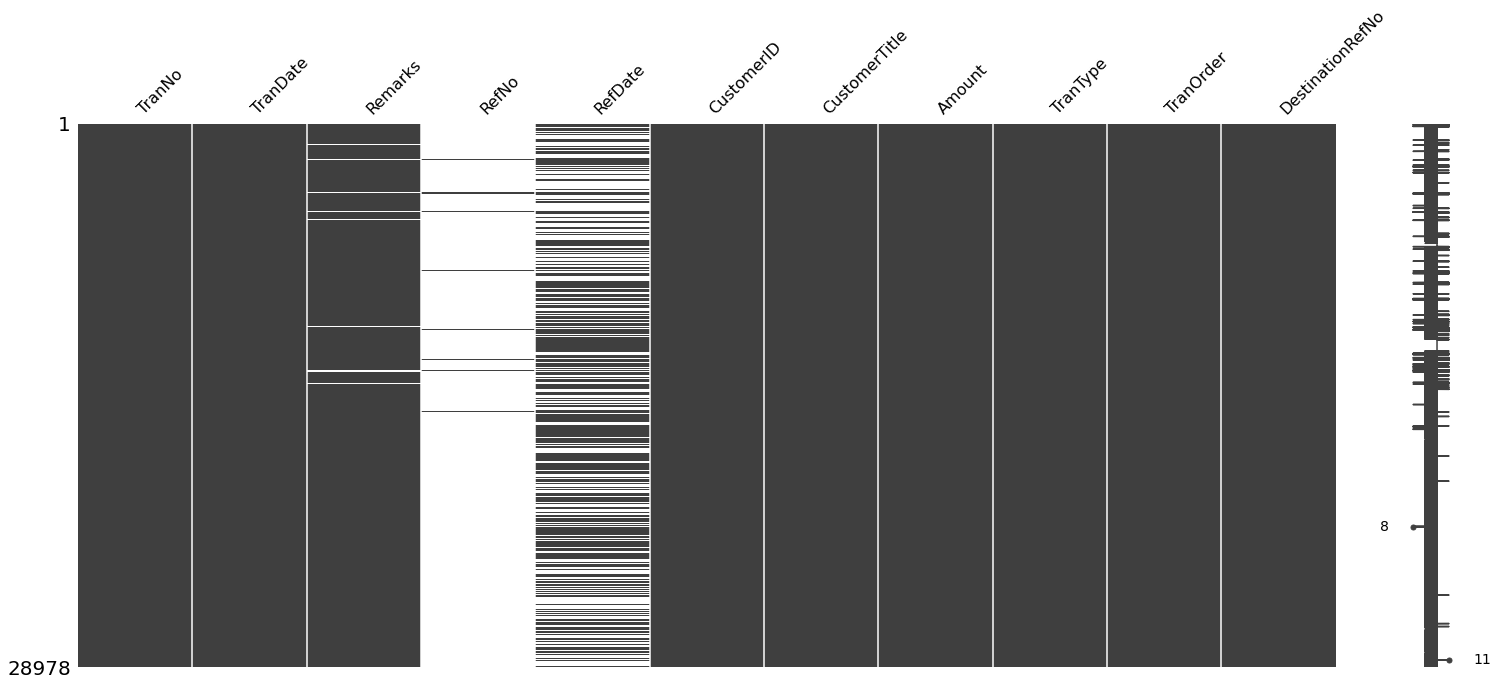

In [261]:
#checking where the data is missing through matrix 
msno.matrix(df1)

## What have we found out about the data so far?

- The data seems to have null values in only three columns whereas the rest of the columns do not show any null values. 
- The null values are in categorical data, therefore we can drop those 
- Though it is quite visible (the relation between the columns), however, we would still create a heatmap to ensure what steps to take for the null values

In [262]:
#checking for unique values for the columns with missing values
# checking which value values are unique
df1.Remarks.unique()

array([nan, 'opening adjust ',
       'Purchase white Zeera 40kgs @600/kg approved by faizan ', ...,
       'cardboard boxes and carton wastage', 'online yousuf qureshi  ',
       'c.p 25kg  20  bags@335/kg\nbilty#8218/20'], dtype=object)

In [263]:
df1.RefNo.unique()

array(['kawish', nan, 'rcd cash asim ckr', 'asim ckr', 'rasheed pndi',
       '32..raheem chq# 262 hmbl', 'abid chemical fsb',
       'abid chemical fsb.', '126..laiq sb', '#566',
       'foocha chq # 9416 dubai', 'i.t foocha',
       '38..arsalan jodia chq # 1616 hmbl',
       '39.arsalan jodia chq # 1513 hmbl', 'cash chq arsalan',
       '39# arsaln', '1', '3', '114..foocha 1644 dubai',
       '115..anz 1644 albaraka', '116..arsalan', '117# foocha',
       'rcd cash arsalan', '129..arsalan', '130..arsalan', '137..foocha',
       '139..arsalan', '138..arsalan ', '140..arsalan ', '142..arsalan ',
       '141..arsalan ', '163..rcd arsalan', '160..rcd arsalan',
       'asif fsb', '123..asif prime', '124..asif prime ',
       '122..asif prime', '37..bhayafood chq# 515 hbl',
       'rcd online from bin dawood', 'bin dawood 1', '5',
       'online bindawood ', 'bindawood', 'online bindawood.. ',
       'online hbl rf', '86..', 'kamran mardan', 'kamran mardan 1',
       '54..rcd from kolson 

In [264]:
df1.RefDate.unique()

array(['01/01/1900', '06/02/2019', nan, '12/03/2019', '22/01/2020',
       '29/10/2020', '18/01/2019', '19/10/2019', '06/12/2018',
       '30/01/2019', '13/12/2018', '18/03/2019', '31/01/2019',
       '19/03/2020', '21/01/2019', '24/01/2019', '05/03/2019',
       '07/03/2019', '08/05/2019', '08/07/2019', '07/10/2019',
       '29/10/2019', '09/10/2019', '12/12/2019', '30/12/2019',
       '01/02/2020', '16/04/2020', '29/05/2020', '14/07/2020',
       '31/08/2020', '01/09/2020', '25/09/2020', '23/10/2020',
       '19/11/2020', '22/12/2020', '26/01/2021', '05/03/2021',
       '11/03/2021', '14/04/2021', '07/06/2021', '13/08/2021',
       '24/09/2021', '16/11/2021', '26/11/2021', '24/02/2022',
       '28/03/2022', '16/01/2019', '05/12/2018', '26/01/2019',
       '19/12/2018', '10/01/2019', '21/02/2019', '04/01/2019',
       '24/10/2019', '12/01/2019', '22/01/2019', '28/01/2019',
       '04/02/2019', '07/02/2019', '13/02/2019', '18/02/2019',
       '20/02/2019', '22/02/2019', '25/02/2019', '

- After looking at the values of the data. I realised that 
    - They cannot be filled using any method
    - The values are not only categorical but also messy
    - They look like they would not be able to assist with any form of data analysis therefore it is best to drop them 

In [265]:
#dropping columns that will not assist us with data analysis
df1 = df1.drop(['Remarks', 'RefNo', 'RefDate'], axis = 1)

In [361]:
#changing amount type
#removing commas from numbers so that it is easy to convert the dat type from string to numberic 
df1.replace(',','', regex=True, inplace=True)

In [364]:
df1['Amount'] = df1['Amount'].astype('float32')
df1['DestinationRefNo'] = df1['DestinationRefNo'].astype('str')

<AxesSubplot:>

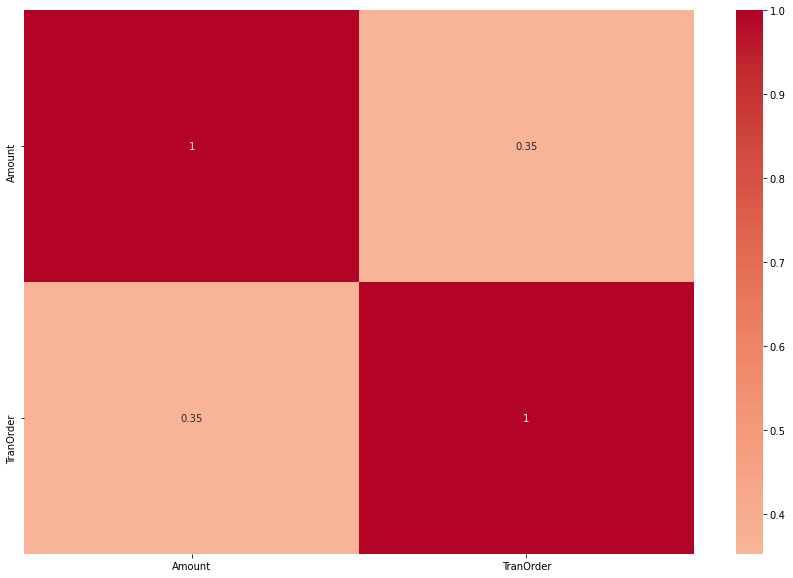

In [365]:
#creating a heatmap for correlation
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', center = 0)

- We can notice one this in this data set is that since this data set is for customer ledger, there are not many columns, furthermore, there arent any strong correlations either. One insight we can gain here is that there is a good chance that this dataset might not even produce any potential KPIs. But that does not mean that we leave out the possiblity entirely 

In [267]:
#checking for sum of null values in each column again
df1.isnull().sum()

TranNo              0
TranDate            0
CustomerID          0
CustomerTitle       0
Amount              0
TranType            0
TranOrder           0
DestinationRefNo    0
dtype: int64

In [268]:
#keeping check of unique values 
#making sure that all customer ids are unique
df1['CustomerID'].nunique()

460

In [366]:
df1['DestinationRefNo'].nunique()

460

In [367]:
df1['TranOrder'].nunique()

3

In [368]:
df1.TranOrder.unique()

array([1, 4, 3], dtype=int64)

- The unique values can tell that there are 460 customer data in the ledger. We can keep this in mind for future 

- Since we are done with the first data sheet we will go through the second one

### Sheet 2 - Customer

In [269]:
#checking datatypes that we are dealing with
df2.dtypes

CustomerCode                 int64
CustomerTitle               object
DestinationCategoryTitle    object
DestinationGroupTitle       object
Email                       object
ContactNumber               object
MobileNumber                object
CreditDays                   int64
ISRegistered                object
STRegistrationNo             int64
AccountCode                  int64
AccountTitle                object
NTN                         object
NationalTitle               object
RegionTitle                 object
TerritoryTitle              object
TownTitle                   object
ZoneTitle                   object
Active                      object
Address                     object
dtype: object

- The data has a lot of categorical data as we can see. We might be able to extract dimensions out of it. 

In [270]:
#checking total number of rows and columns
df2.shape

(518, 20)

In [271]:
#checking for sum of null values in each column
df2.isnull().sum()

CustomerCode                0
CustomerTitle               0
DestinationCategoryTitle    0
DestinationGroupTitle       0
Email                       0
ContactNumber               0
MobileNumber                0
CreditDays                  0
ISRegistered                0
STRegistrationNo            0
AccountCode                 0
AccountTitle                0
NTN                         0
NationalTitle               0
RegionTitle                 0
TerritoryTitle              0
TownTitle                   0
ZoneTitle                   0
Active                      0
Address                     0
dtype: int64

<AxesSubplot:>

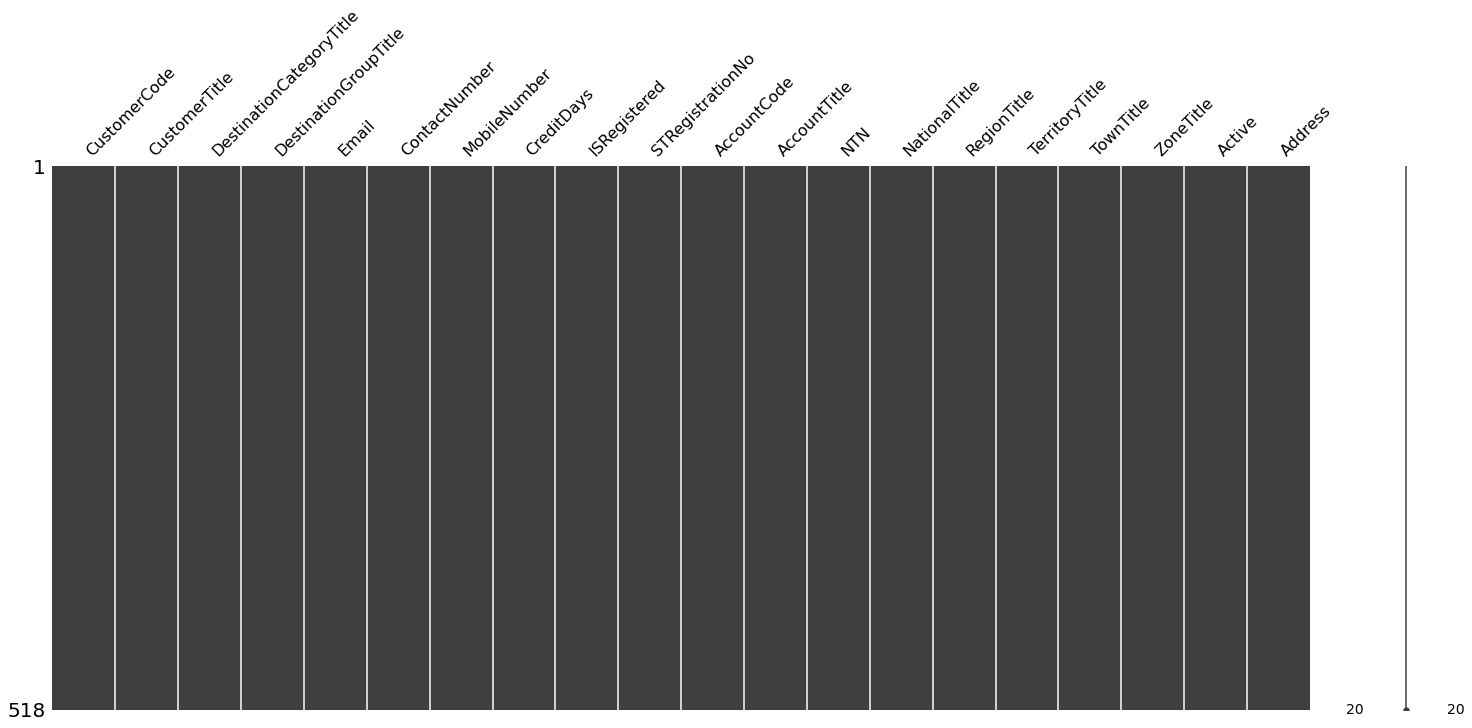

In [272]:
#checking where the data is missing through matrix 
msno.matrix(df2)

In [273]:
#changing customer Code to object
df2['CustomerCode'] = df2['CustomerCode'].astype('str')

- Because this sheet is majorly categorical with no missing values, there is not much we can do about it. There are no extrapolations or imputations required in the data. It is good to go

### Sheet 3 - Customer Wise

In [274]:
df3.head()

,Transaction ID,Transaction Date,Customer Title,Item ID,Item Title,Unit Title,Quantity,Rate,Gross Amount,Discount Amount,Value Excl Tax,Tax Amount,Net Amount
0,1819-000004,14/12/2018,Haram traders shahfaisal,55.0,HOT AND SOUR SOUP 55 GM,pcs,576.00,50.00,"28,800.00","3,456.00",25344.0,0.0,"25,344.00"
1,1819-000004,14/12/2018,Haram traders shahfaisal,3.0,SEASONING CHICKEN POWDER 18GM,pcs,"5,760.00",12.00,"69,120.00","8,294.40",60825.6,0.0,"60,825.60"
2,1819-000004,14/12/2018,Haram traders shahfaisal,175.0,PAPAD CRACKER BUTTON COLOR 1KG,kg,24.00,160.00,"3,840.00",460.80,3379.2,0.0,"3,379.20"
3,1819-000004,14/12/2018,Haram traders shahfaisal,40.0,PAPAD CRACKER COLOR 1KG,kg,144.00,160.00,"23,040.00","2,764.80",20275.2,0.0,"20,275.20"
4,1819-000004,14/12/2018,Haram traders shahfaisal,6.0,SEASONING CHICKEN POWDER POUCH 1KG,pcs,144.00,400.00,"57,600.00","6,912.00",50688.0,0.0,"50,688.00"


In [275]:
#checking total number of rows and columns
df3.shape

(33712, 13)

In [276]:
#checking datatypes that we are dealing with
df3.dtypes

Transaction ID       object
Transaction Date     object
Customer Title       object
Item ID             float64
Item Title           object
Unit Title           object
Quantity             object
Rate                 object
Gross Amount         object
Discount Amount      object
Value Excl Tax      float64
Tax Amount          float64
Net Amount           object
dtype: object

In [277]:
#checking for sum of null values in each column
df3.isnull().sum()

Transaction ID      1
Transaction Date    1
Customer Title      1
Item ID             1
Item Title          1
Unit Title          1
Quantity            0
Rate                1
Gross Amount        0
Discount Amount     0
Value Excl Tax      0
Tax Amount          0
Net Amount          0
dtype: int64

<AxesSubplot:>

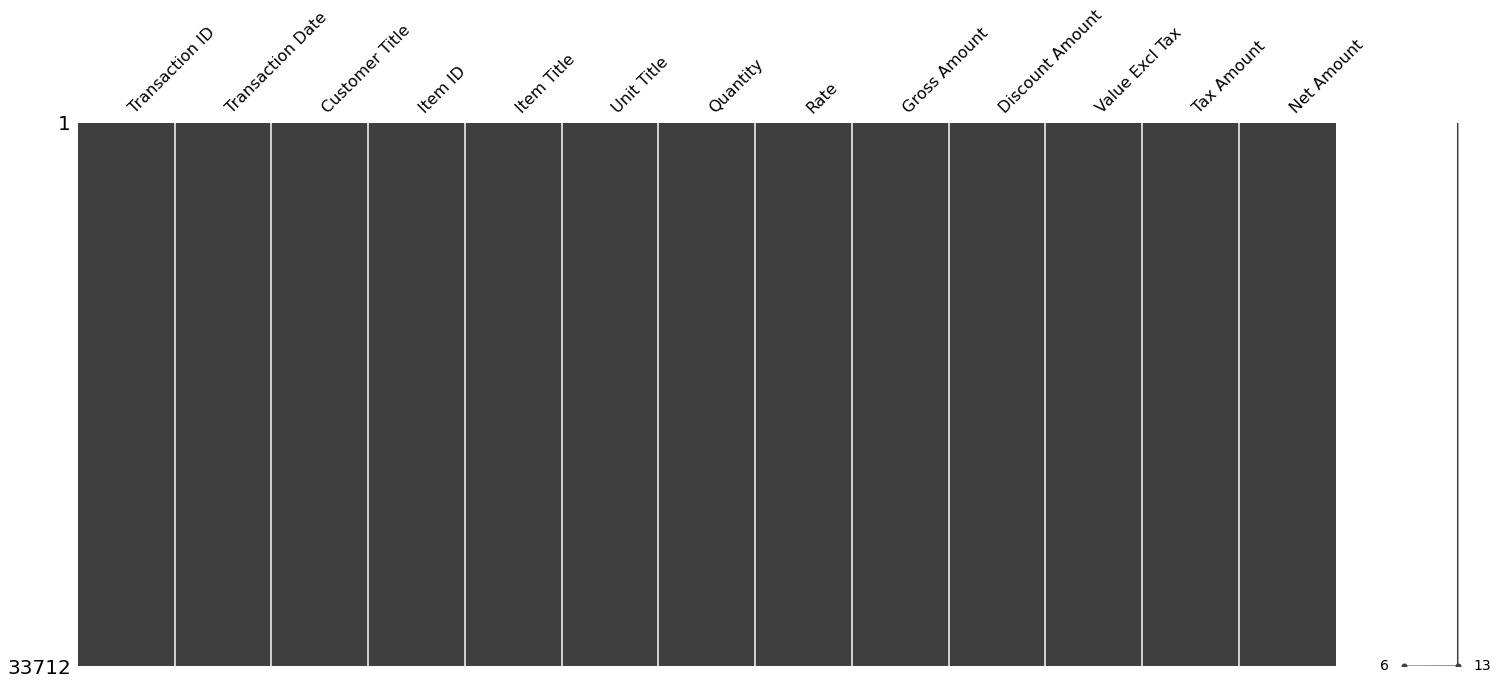

In [278]:
#checking where the data is missing through matrix 
msno.matrix(df3)

In [279]:
#there is only 1 missing value in some of the columns, we can check where they are and drop if they are not needed
#checking for null values in the row 
Trans_null = df3[df3['Transaction ID'].isnull()].index.tolist()
print(Trans_null)

[33711]


In [280]:
#Transaction Date
TransD_null = df3[df3['Transaction Date'].isnull()].index.tolist()
print(TransD_null)

[33711]


In [281]:
#Customer Title
CusT_null = df3[df3['Customer Title'].isnull()].index.tolist()
print(CusT_null)

[33711]


In [282]:
#Item Title
IT_null = df3[df3['Item Title'].isnull()].index.tolist()
print(IT_null)

[33711]


- Since we can see that there is missing values in the same row we will just drop the row

In [283]:
df3 = df3.drop(33711)

In [284]:
#checking for sum of null values in each column
df3.isnull().sum()

Transaction ID      0
Transaction Date    0
Customer Title      0
Item ID             0
Item Title          0
Unit Title          0
Quantity            0
Rate                0
Gross Amount        0
Discount Amount     0
Value Excl Tax      0
Tax Amount          0
Net Amount          0
dtype: int64

- we have dealt with the missing value case~

- Now this is a very crucial part of the dataset. Here we have interesting KPIs such as Quantity, rate, gross amount, discount amount, etc. The first thing that we have to do is change data types
(due to some input issues we need to fix the entries as well)

In [285]:
#checking data entry issue
df3.where(df3['Quantity'] == '5,760.00')

,Transaction ID,Transaction Date,Customer Title,Item ID,Item Title,Unit Title,Quantity,Rate,Gross Amount,Discount Amount,Value Excl Tax,Tax Amount,Net Amount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1819-000004,14/12/2018,Haram traders shahfaisal,3.0,SEASONING CHICKEN POWDER 18GM,pcs,"5,760.00",12.00,"69,120.00","8,294.40",60825.6,0.0,"60,825.60"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
#removing commas from numbers so that it is easy to convert the dat type from string to numberic
df3.replace(',','', regex=True, inplace=True)

In [287]:
df3.head()

,Transaction ID,Transaction Date,Customer Title,Item ID,Item Title,Unit Title,Quantity,Rate,Gross Amount,Discount Amount,Value Excl Tax,Tax Amount,Net Amount
0,1819-000004,14/12/2018,Haram traders shahfaisal,55.0,HOT AND SOUR SOUP 55 GM,pcs,576.00,50.00,28800.00,3456.00,25344.0,0.0,25344.00
1,1819-000004,14/12/2018,Haram traders shahfaisal,3.0,SEASONING CHICKEN POWDER 18GM,pcs,5760.00,12.00,69120.00,8294.40,60825.6,0.0,60825.60
2,1819-000004,14/12/2018,Haram traders shahfaisal,175.0,PAPAD CRACKER BUTTON COLOR 1KG,kg,24.00,160.00,3840.00,460.80,3379.2,0.0,3379.20
3,1819-000004,14/12/2018,Haram traders shahfaisal,40.0,PAPAD CRACKER COLOR 1KG,kg,144.00,160.00,23040.00,2764.80,20275.2,0.0,20275.20
4,1819-000004,14/12/2018,Haram traders shahfaisal,6.0,SEASONING CHICKEN POWDER POUCH 1KG,pcs,144.00,400.00,57600.00,6912.00,50688.0,0.0,50688.00


In [288]:
df3['Item ID'] = df3['Item ID'].astype('str')
df3['Quantity'] = df3['Quantity'].astype(np.float32)
df3['Rate'] = df3['Rate'].astype(np.float32)
df3['Gross Amount'] = df3['Gross Amount'].astype('float64')
df3['Discount Amount'] = df3['Discount Amount'].astype('float64')
df3['Net Amount'] = df3['Net Amount'].astype('float64')

In [289]:
#checking datatypes
df3.dtypes

Transaction ID       object
Transaction Date     object
Customer Title       object
Item ID              object
Item Title           object
Unit Title           object
Quantity            float32
Rate                float32
Gross Amount        float64
Discount Amount     float64
Value Excl Tax      float64
Tax Amount          float64
Net Amount          float64
dtype: object

- even though the tax column does not have null values, it has 0.0 as input. therefore we would drop the column

In [290]:
df3 = df3.drop(columns="Tax Amount")

<AxesSubplot:>

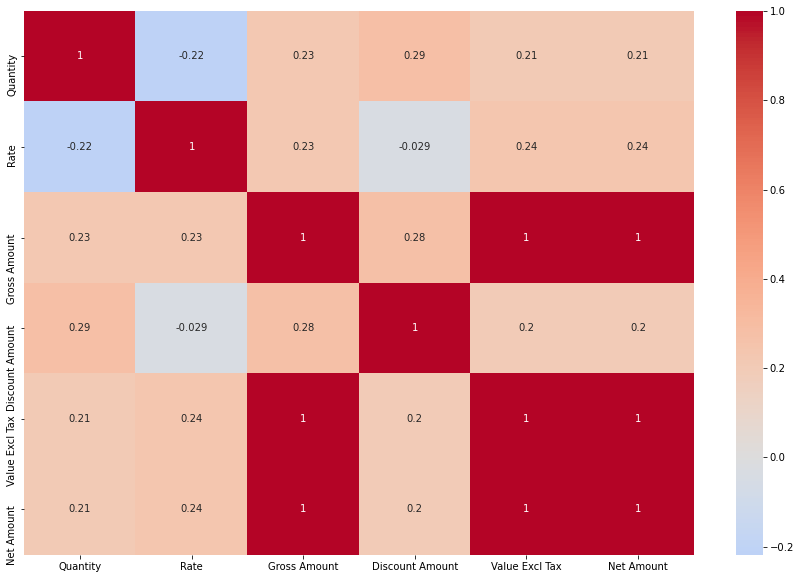

In [291]:
#creating a heatmap for correlation
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', center = 0)

- Doing the same for the next 3 sheets

### Sheet 4 - Items 

In [292]:
df5.head()

,ItemRefNo,ItemTitle,CategoryTitle,SupplierTitle,ClassTitle,GroupTitle,TypeTitle,PackagingTitle,UOMTitle,TaxCategoryTitle,...,IsBatchNoAutoGenerate,IsBatchWiseQuantityAsFullDespatchQuantity,IsCustomDuty,NonInventory,Production,Purchase,QC,QCRequired,Sale,TaxBasedOnCustomer
0,187,Scourer 18gm,Scourer,None,scourer,finished goods,none,None,pcs,None,...,No,No,No,No,No,No,No,No,No,No
1,188,Scourer 36gm,Scourer,None,scourer,finished goods,none,None,pcs,None,...,No,No,No,No,No,No,No,No,No,No
2,235,Scourer 20gm,Scourer,None,scourer,finished goods,none,None,pcs,None,...,No,No,No,No,No,No,No,No,No,No
3,408,SCOURER 15GM,Scourer,None,scourer,finished goods,none,None,pcs,None,...,No,No,No,No,No,No,No,No,No,No
4,184,PAPAD TRIANGLE 500GM,cracker,None,3d,finished goods,none,None,pcs,None,...,No,No,No,No,No,No,No,No,No,No


In [293]:
#checking total number of rows and columns
df5.shape

(578, 28)

In [294]:
#checking datatypes that we are dealing with
df5.dtypes

ItemRefNo                                      int64
ItemTitle                                     object
CategoryTitle                                 object
SupplierTitle                                 object
ClassTitle                                    object
GroupTitle                                    object
TypeTitle                                     object
PackagingTitle                                object
UOMTitle                                      object
TaxCategoryTitle                              object
PartNumber                                    object
Make                                          object
PcsPerPkt                                    float64
Active                                        object
DecimalPlaceCount                              int64
ManualRate                                    object
PurchaseRate                                 float64
BatchNoRequired                               object
IsBatchNoAutoGenerate                         

In [295]:
#checking for sum of null values in each column
df5.isnull().sum()

ItemRefNo                                     0
ItemTitle                                     0
CategoryTitle                                 0
SupplierTitle                                 0
ClassTitle                                    0
GroupTitle                                    0
TypeTitle                                     0
PackagingTitle                                0
UOMTitle                                      0
TaxCategoryTitle                              0
PartNumber                                   42
Make                                         33
PcsPerPkt                                     0
Active                                        0
DecimalPlaceCount                             0
ManualRate                                    0
PurchaseRate                                  0
BatchNoRequired                               0
IsBatchNoAutoGenerate                         0
IsBatchWiseQuantityAsFullDespatchQuantity     0
IsCustomDuty                            

<AxesSubplot:>

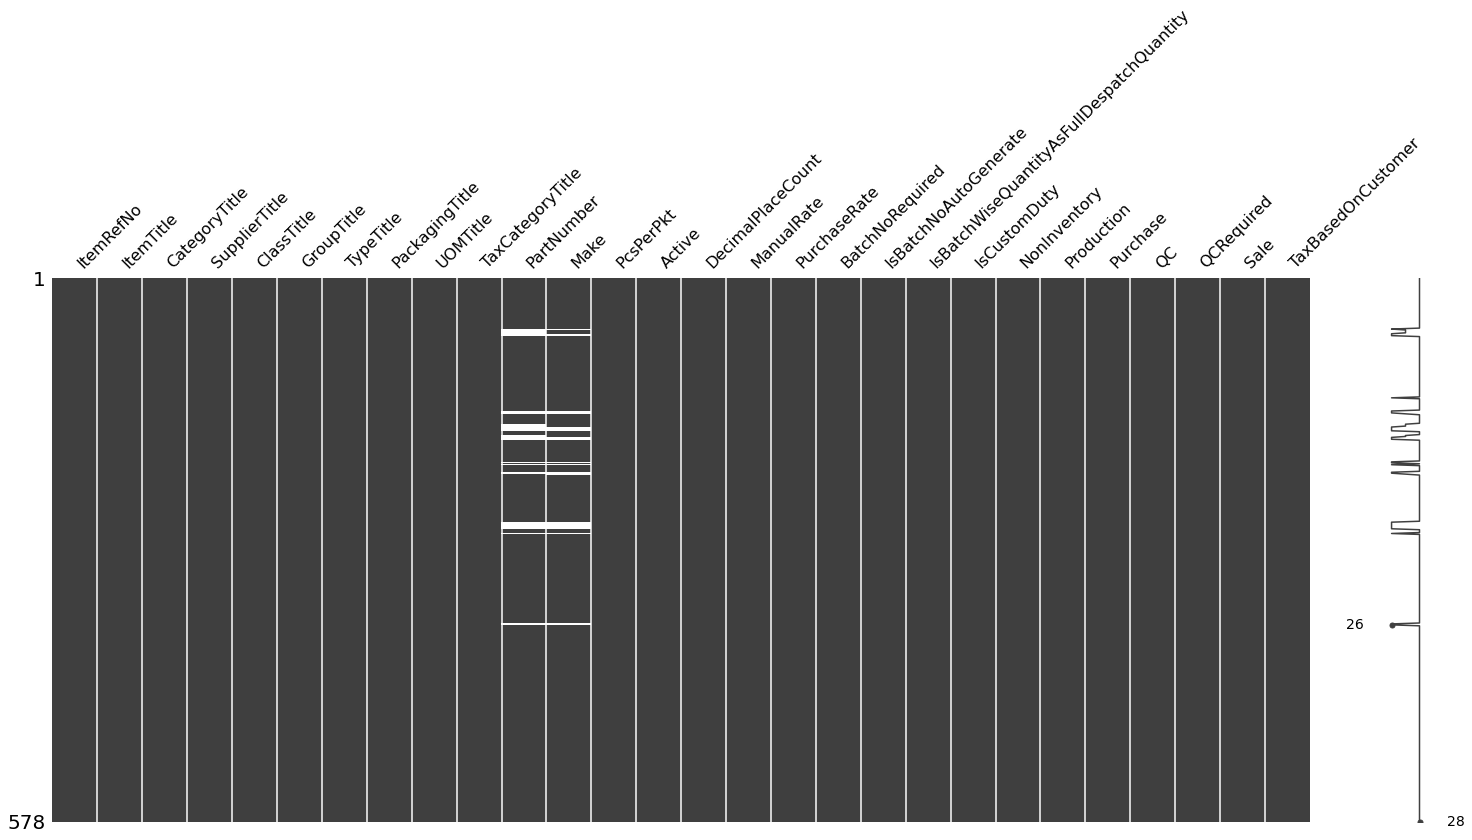

In [296]:
#checking where the data is missing through matrix 
msno.matrix(df5)

In [297]:
#keeping check of unique values 
df5['PartNumber'].nunique()

26

In [298]:
#keeping check of unique values 
df5['Make'].nunique()

9

In [299]:
# checking which value values are unique
df5.PartNumber.unique()

array(['none', '15', '300', '12', nan, '0', '1000', '200', '27', '100',
       '250', '500', '18', '50', '56', '67', '53', '60', '10', '165',
       '330', '150', '25', '125', '375', 'None', '110'], dtype=object)

In [300]:
# checking which value values are unique
df5.Make.unique()

array(['none', nan, '-', '0', 'production', 'm&f', '72', 'F&A Int.',
       'AONE', 'A ONE PACKAGES'], dtype=object)

- After going through the data mannually i noticed that most of the data in the column was of null values entered as "none" The columns are useless therefore should be dropped

In [301]:
df5 = df5.drop(columns=["PartNumber", "Make"])

<AxesSubplot:>

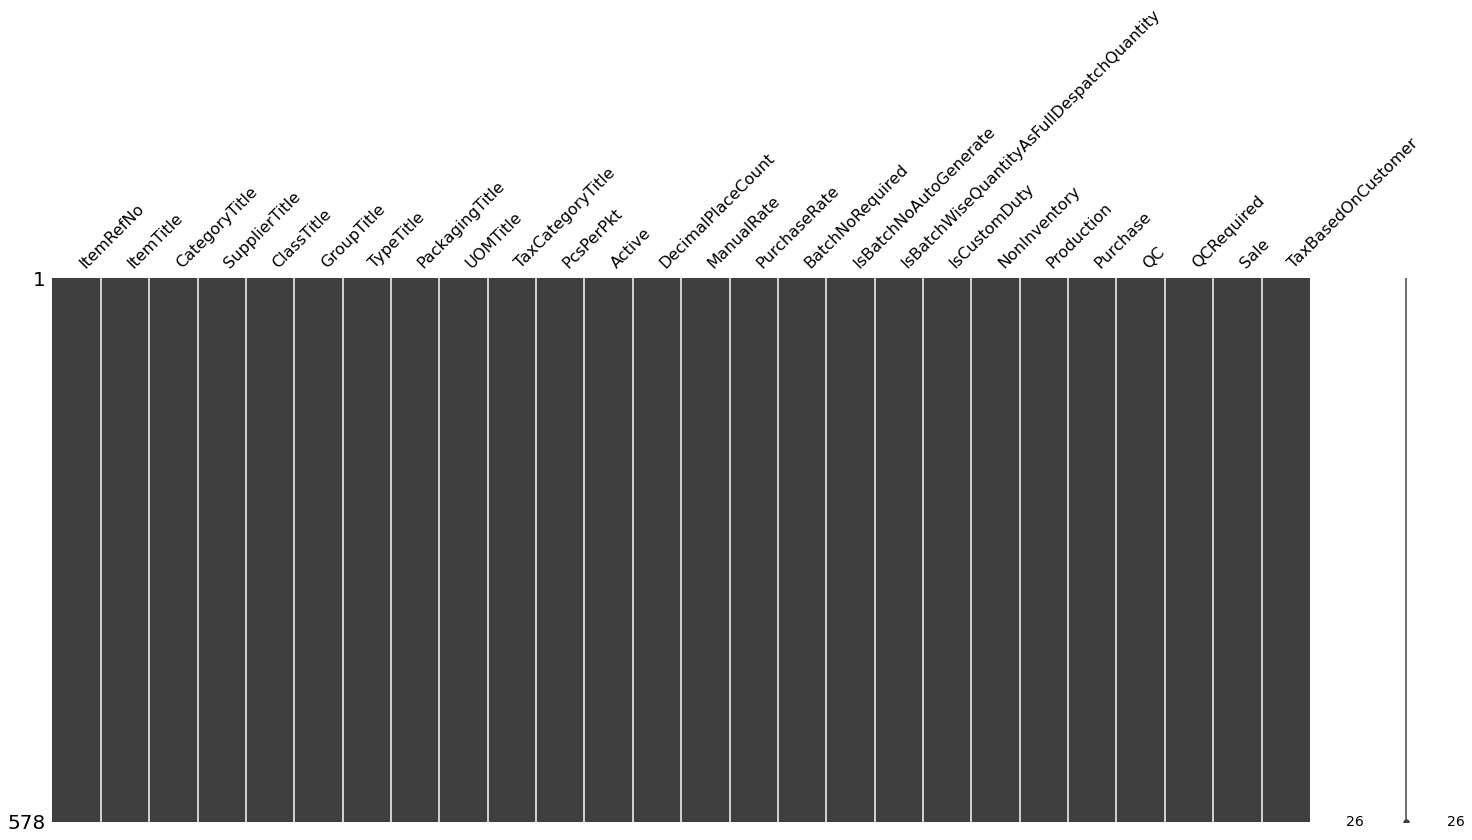

In [302]:
#checking where the data is missing through matrix 
msno.matrix(df5)

- I also noticed that some columns have binary yes/no enteries. So we wou;d be dropping those as well

In [303]:
df5 = df5.drop(columns=["IsBatchNoAutoGenerate", "IsBatchWiseQuantityAsFullDespatchQuantity", "IsCustomDuty", "QCRequired"])

In [304]:
#checking datatypes that we are dealing with
df5.dtypes

ItemRefNo               int64
ItemTitle              object
CategoryTitle          object
SupplierTitle          object
ClassTitle             object
GroupTitle             object
TypeTitle              object
PackagingTitle         object
UOMTitle               object
TaxCategoryTitle       object
PcsPerPkt             float64
Active                 object
DecimalPlaceCount       int64
ManualRate             object
PurchaseRate          float64
BatchNoRequired        object
NonInventory           object
Production             object
Purchase               object
QC                     object
Sale                   object
TaxBasedOnCustomer     object
dtype: object

In [305]:
#changing Item ref number to object type
df5['ItemRefNo'] = df5['ItemRefNo'].astype('str')

### Sheet 5 - Purchase

In [306]:
df6.head()

,Transaction ID,Transaction Date,Supplier ID,Supplier Title,Supplier Category,Project ID,Project Title,Currency ID,Currency Title,Type Title,...,DC Date,StockStatus ID,StockStatus Title,Quantity,Rate,Gross Amount,DiscountAmount,SalesTax Rate,SalesTax Amount,Net Amount
0,1819-000001,12/1/2018,118,Sugar Bashir Sugar (SAAD) JODIA,SERVICES,2,None,1,PAK Rupee,sugar,...,12/21/2018,1,None,"1,250.00",52.00,"65,000.00",0.0,0.0,0.00,"65,000.00"
1,1819-000018,12/4/2018,104,Speciality Printers,PACKING MATERIAL,2,None,1,PAK Rupee,soup & ckp,...,12/24/2018,1,None,897.19,445.00,"399,249.55",0.0,0.0,"67,872.42","467,121.97"
2,1819-000002,12/4/2018,114,Atif Riaz (Rafhan Corn Starch),RAW MATERIAL,2,None,1,PAK Rupee,starchCorn,...,12/21/2018,1,None,"15,000.00",69.85,"1,047,735.00",0.0,0.0,0.00,"1,047,735.00"
3,1819-000003,12/4/2018,14,Unity Foods Limited,RAW MATERIAL,2,None,1,PAK Rupee,HPKO,...,12/21/2018,1,None,"2,000.00",199.00,"398,000.00",0.0,0.0,0.00,"398,000.00"
4,1819-000017,12/4/2018,133,Vendor cash partys,SERVICES,2,None,1,PAK Rupee,cornFlour,...,12/24/2018,1,None,200.00,39.00,"7,800.00",0.0,0.0,0.00,"7,800.00"


In [307]:
#checking total number of rows and columns
df6.shape

(3030, 32)

In [308]:
#checking datatypes that we are dealing with
df6.dtypes

Transaction ID        object
Transaction Date      object
Supplier ID            int64
Supplier Title        object
Supplier Category     object
Project ID             int64
Project Title         object
Currency ID            int64
Currency Title        object
Type Title            object
Godown Title          object
Category Title        object
Class Title           object
Packaging Title       object
Brand Title           object
Item ID                int64
Item Title            object
Unit Title            object
Item Description      object
Bill No              float64
Bill Date             object
DC No                 object
DC Date               object
StockStatus ID         int64
StockStatus Title     object
Quantity              object
Rate                  object
Gross Amount          object
DiscountAmount       float64
SalesTax Rate        float64
SalesTax Amount       object
Net Amount            object
dtype: object

In [309]:
#removing commas from numbers so that it is easy to convert the dat type from string to numberic just like we did previously
df6.replace(',','', regex=True, inplace=True)

In [310]:
df6['Item ID'] = df6['Item ID'].astype('str')
df6['Supplier ID'] = df6['Supplier ID'].astype('str')
df6['StockStatus ID'] = df6['StockStatus ID'].astype('str')
df6['Quantity'] = df6['Quantity'].astype(np.float32)
df6['Rate'] = df6['Rate'].astype(np.float32)
df6['Gross Amount'] = df6['Gross Amount'].astype('float64')
df6['SalesTax Amount'] = df6['SalesTax Amount'].astype('float64')
df6['Net Amount'] = df6['Net Amount'].astype('float64')
df6['Project ID'] = df6['Project ID'].astype('str')
df6['Bill No'] = df6['Bill No'].astype('str')

In [311]:
#checking datatypes that we are dealing with
df6.dtypes

Transaction ID        object
Transaction Date      object
Supplier ID           object
Supplier Title        object
Supplier Category     object
Project ID            object
Project Title         object
Currency ID            int64
Currency Title        object
Type Title            object
Godown Title          object
Category Title        object
Class Title           object
Packaging Title       object
Brand Title           object
Item ID               object
Item Title            object
Unit Title            object
Item Description      object
Bill No               object
Bill Date             object
DC No                 object
DC Date               object
StockStatus ID        object
StockStatus Title     object
Quantity             float32
Rate                 float32
Gross Amount         float64
DiscountAmount       float64
SalesTax Rate        float64
SalesTax Amount      float64
Net Amount           float64
dtype: object

- Along with the Title, there are alot of IDs, we only need one of these as categorical data, therefore we would remove some of these columns

In [312]:
df6 = df6.drop(columns=["Supplier ID", "Project ID", "Currency ID", "Item ID", "StockStatus ID", "DC No", "DC Date", "Transaction ID"])

In [313]:
#checking for sum of null values in each column
df6.isnull().sum()

Transaction Date      0
Supplier Title        0
Supplier Category     0
Project Title         0
Currency Title        0
Type Title            0
Godown Title          0
Category Title        0
Class Title           0
Packaging Title       0
Brand Title           0
Item Title            0
Unit Title            0
Item Description     35
Bill No               0
Bill Date             0
StockStatus Title     0
Quantity              0
Rate                  0
Gross Amount          0
DiscountAmount        0
SalesTax Rate         0
SalesTax Amount       0
Net Amount            0
dtype: int64

<AxesSubplot:>

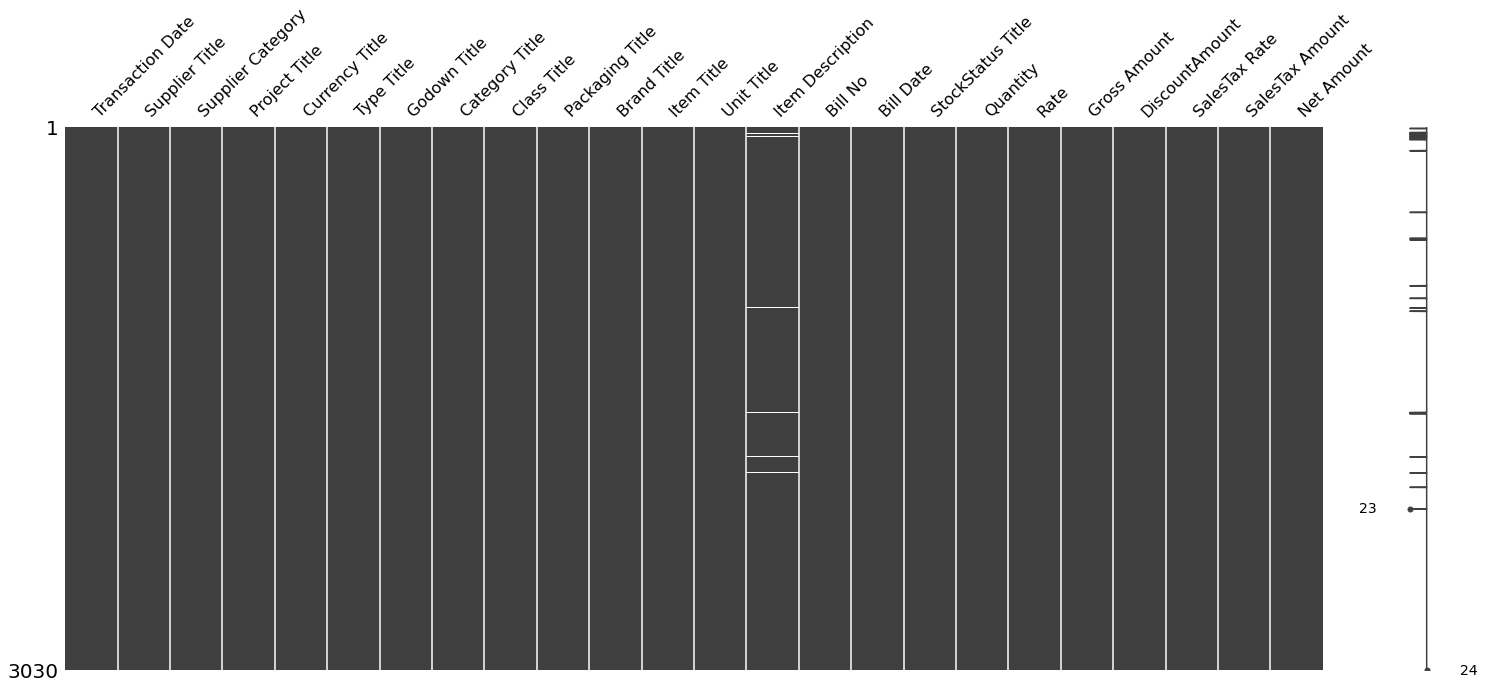

In [314]:
#checking where the data is missing through matrix 
msno.matrix(df6)

In [315]:
# checking which value values are unique
df6["Item Description"].unique()

array(['invert sugar', 'chicken powder 100gm roll  total 78rolls',
       'cracker & chicken powder production', ..., 'starch 300bags',
       'cooking oil 1100 kg', '3d party mix 1250 kg'], dtype=object)

In [316]:
df6 = df6.dropna(subset=['Item Description'])

In [317]:
#checking for sum of null values in each column
df6.isnull().sum()

Transaction Date     0
Supplier Title       0
Supplier Category    0
Project Title        0
Currency Title       0
Type Title           0
Godown Title         0
Category Title       0
Class Title          0
Packaging Title      0
Brand Title          0
Item Title           0
Unit Title           0
Item Description     0
Bill No              0
Bill Date            0
StockStatus Title    0
Quantity             0
Rate                 0
Gross Amount         0
DiscountAmount       0
SalesTax Rate        0
SalesTax Amount      0
Net Amount           0
dtype: int64

- we will check for unique values in the remaining columns and see if would be useful in the wrangling process or not
- This is mainly for categorical data to ensure if there are enough values in the column to turn them into dimensions

In [318]:
#checking for unique values
df6['Supplier Title'].nunique()

150

In [319]:
df6['Supplier Title'].unique()

array(['Sugar Bashir Sugar (SAAD) JODIA', 'Speciality Printers',
       'Atif Riaz (Rafhan Corn Starch)', 'Unity Foods Limited',
       'Vendor cash partys', 'A one Packages Cartons',
       'Mirpurkhas Sugar Mills ltd', 'Khamissa International',
       'Humayun Cargill ( javed sarvana )', 'Al Habib Masala',
       'Chemicalwala Corp. Jodia', 'Usman Ice Box Maker',
       'Hub Salt Refinery', 'N.a Enterprises', 'Foodlink',
       'Al-Ameen Salt', 'Qureshi Flour Mills', 'Flavor M.A.J Flavor',
       'Areeba food industries', 'MULTI PACKAGES AAMIR',
       'Khizer Printers', 'Silat Impex Abdul Qadir starch', 'Hussain Can',
       'HANGZHOU ZHONGBAO IMP AND EXP CORP.LTD.', 'Marjan food',
       'F&A International', 'ANHUI EBUY INTERNATIONAL', 'Klarg Exports',
       'CJ CHEILJEDANG CORPORATION', 'MAK KEMICAL', 'Brother Enterprise',
       'Habib ADM Limited', 'Bhaya food dip ',
       'Tape Fair Pack International pvt ltd', 'Urban Packages',
       'S.K Plastic', 'Deer food industries', '

In [320]:
df6['Supplier Category'].unique()

array(['SERVICES', 'PACKING MATERIAL', 'RAW MATERIAL',
       'International Supplier', 'Local Supplier', 'GENERAL & CONSUMABLE',
       'Wali Serivices'], dtype=object)

In [321]:
df6['Project Title'].unique()

array(['None'], dtype=object)

In [322]:
df6['Currency Title'].unique()

array(['PAK Rupee', 'US Dollar', 'Euro', 'chinese yuan'], dtype=object)

In [323]:
df6['Type Title'].unique()

array(['sugar', 'soup & ckp', 'starchCorn', 'HPKO', 'cornFlour',
       'mingalz', 'proteinSodiumCaseinate', 'CocoaPowder', 'powderGarlic',
       'powderGinger', 'powderKlonji', 'powderSaunf', 'powderHaldi',
       'powderMustard', 'powderKhatai', 'acid sodium di acetate',
       'whipcream', 'salt', 'PropyleneGlycolLiquid', 'white',
       'dextroseAnhydrouse', 'maidaHard', 'maltExtractLiquid', 'lime',
       'mango', 'dipChocolate', 'ricewhole', 'acid citric', 'cakegel',
       'hpmc', 'acid adipic', 'dsp', 'iplusG', 'yeastExtract',
       'proteinWheatGluten', 'cookingOil', 'powderFructose', 'tween60',
       'FDCorn', 'vanillanMingalz', 'sorbitol', 'tomato', 'dipStrawberry',
       'Production', 'cracker', 'Bakery', 'none', 'maltoseSyrup',
       'chickenOil', 'riceflour', 'acid tartaric', 'powderSkimmedMilk',
       'zeera whole', 'acid malic', 'chickenIFF', 'sio2', 'maltodexterin',
       'colorCaramel', 'calciumCarbonate', 'maidaSooji',
       'sodiumBiCarbonate', 'Biryani', 'm

In [324]:
df6['Godown Title'].unique()

array(['Factory Warehouse', 'HO Ware House', 'Jamshed town Warehouse',
       'Eximpo Cold storage'], dtype=object)

In [325]:
df6['Category Title'].unique()

array(['glucose & sugar', 'filmFlexiblePackaging', 'flour', 'Fat',
       'cartons', 'milkAndProteins', 'vegetable powder', 'foodChem',
       'food color', 'Flavors', 'partiallyFinished', 'flexible packaging',
       'displayBox', 'dehydratedVegetables', 'bucket', 'bag',
       'emulsifier', 'tape', 'label', 'marketingMaterial',
       'cleanignRelated', 'General factory purchase', 'seasoning',
       'Machinery Spare Parts', 'none', 'machineCosumbale', 'overwrap',
       'Scourer', 'others', 'cracker', 'packagedPowderMix'], dtype=object)

In [326]:
df6['Class Title'].unique()

array(['others', 'soup & ckp', 'cracker', 'whipCream', 'mingalz',
       'chocolate', 'seasoning', 'cakegel', 'kheer', 'extrusion',
       'crackers', 'soups', 'Production', 'Bakery', 'none', 'raita',
       'flour', 'jelly', 'scourer', 'breadcrumb', 'chickenFat',
       'golgappay', 'Handsantizer', 'Hand wash', '3d', 'juice',
       'panReleaseOil', 'chicken powder'], dtype=object)

In [327]:
#Packaging Title      
df6['Packaging Title'].unique()

array(['None', 'Retail', 'Bulk'], dtype=object)

In [328]:
#Brand Title          
df6['Brand Title'].unique()

array(['raw material', 'packing material', 'consumables', 'services',
       'finished goods', 'machineParts'], dtype=object)

In [329]:
#Item Title           
df6['Item Title'].unique()

array(['sugar -moti Ahmed Sb', 'chicken powder 100gm roll (new)',
       'corn starch rafhan 034010', 'Fat Willmar HPKO',
       'Corn Flour MMFS2',
       'Funchies MC1 Carton (dimension 540 x 457 x 406mm)',
       'sugar refined pharma grade', 'sodium Cassienate', 'Cocoa Powder',
       'Garlic Powder Local', 'ginger powder (Sounth)', 'Kalonji',
       'Saunf Powder', 'Turmeric (Haldi)', 'sarson - mustard powder ',
       'Khatai Powder', 'Sodium di Acetate', 'Ice box',
       'Dashi MC1 1kg cracker Carton (dimension 410x325x355 mm)', 'salt',
       'Propylene glycol PG', 'TITANIUM DIOXIDE', 'dextroseAnhydrouse',
       'Hard Maida', 'Malt Extract', 'Lime Flavor k-0308797',
       'Green Mango Flavor D-1510211', 'dipChocolate',
       'chicken zaiqa powder 25kg non woven bag',
       'Display Box Chicken powder 100gm (150x165x130mm)',
       'corn starch rafhan 034010F', 'rice whole', 'CITRIC ACID',
       'Plastic 1kg bucket', 'chicken powder 18gm roll (new)',
       'HPMC methyl ce

In [330]:
#Unit Title           
df6['Unit Title'].unique()

array(['kg', 'pcs', 'none'], dtype=object)

In [331]:
#Bill No              
df6['Bill No'].unique()

array(['nan'], dtype=object)

In [332]:
#Bill Date
df6['Bill Date'].unique()

array(['1/1/1900'], dtype=object)

In [333]:
#StockStatus Title   
df6['StockStatus Title'].unique()

array(['None'], dtype=object)

In [334]:
#removing more columns
df6 = df6.drop(columns=["Packaging Title", "Bill No", "Bill Date", "StockStatus Title"])

In [335]:
#they have no enteries
df6 = df6.drop(columns=["SalesTax Rate", "DiscountAmount"])

## Purpose of Going Through Unique Values
        -Helps us identify dimensions
        -Helps us check for unique values often it happens that the same value is written with different spellings 
        -Helps us understand the range of categorical data so that we could create charts accordingly

<AxesSubplot:>

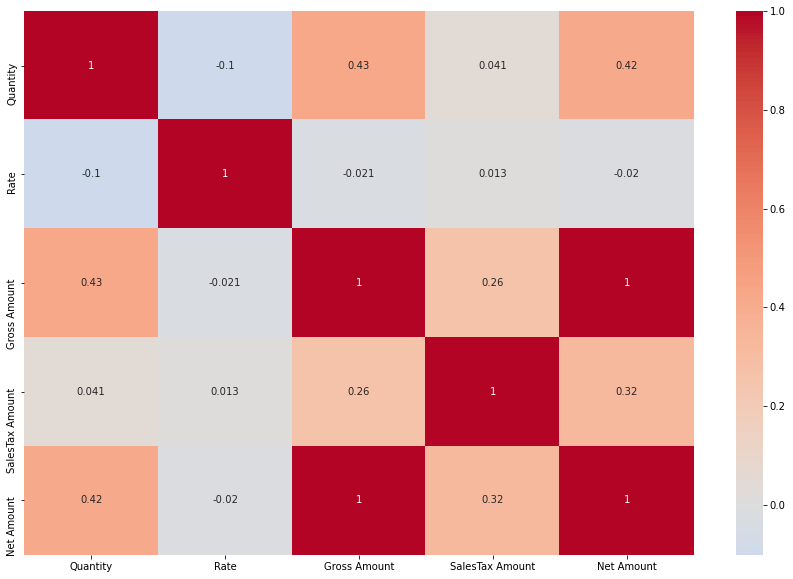

In [336]:
#creating a heatmap for correlation
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df6.corr(), annot=True, cmap='coolwarm', center = 0)

- Finally we will look into the DataDump4 csv 
### Sheet 6 - DataDump4

In [337]:
df4.head()

,sync_time,customerId,Customer,area_Id,Area,town_id,Town,City_id,City,ZoneId,...,amount,Rate,employeeId,employeeName,distributorId,distributorName,ProductBrandId,BrandName,ProductCategoryId,ProductCategoryName
0,11/30/2021 16:39,51278,Baba Oil Shop,3229,FATIMA JINNAH COLONY,113,Karachi,129,Karachi,1,...,624.00,13.00,545,Muzzamil,93,asad enterprise,66,Dashi,10,retail
1,11/30/2021 16:39,51278,Baba Oil Shop,3229,FATIMA JINNAH COLONY,113,Karachi,129,Karachi,1,...,1680.00,70.00,545,Muzzamil,93,asad enterprise,66,Dashi,10,retail
2,11/30/2021 16:40,51279,Obaid Shop,3229,FATIMA JINNAH COLONY,113,Karachi,129,Karachi,1,...,156.00,13.00,545,Muzzamil,93,asad enterprise,66,Dashi,10,retail
3,11/30/2021 16:40,51279,Obaid Shop,3229,FATIMA JINNAH COLONY,113,Karachi,129,Karachi,1,...,99.96,8.33,545,Muzzamil,93,asad enterprise,68,Funchies,10,retail
4,11/30/2021 16:40,51279,Obaid Shop,3229,FATIMA JINNAH COLONY,113,Karachi,129,Karachi,1,...,99.96,8.33,545,Muzzamil,93,asad enterprise,68,Funchies,10,retail


In [338]:
#checking datatypes that we are dealing with
df4.dtypes

sync_time               object
customerId               int64
Customer                object
area_Id                  int64
Area                    object
town_id                  int64
Town                    object
City_id                  int64
City                    object
ZoneId                   int64
Zone                    object
ProductId                int64
ProductName             object
qty                      int64
prod_avl                 int64
prod_foc                 int64
amount                 float64
Rate                   float64
employeeId               int64
employeeName            object
distributorId            int64
distributorName         object
ProductBrandId           int64
BrandName               object
ProductCategoryId        int64
ProductCategoryName     object
dtype: object

In [340]:
#checking total number of rows and columns
df4.shape

(38108, 26)

In [342]:
#removing unnecessary ID columns
df4 = df4.drop(columns=["customerId", "area_Id", "town_id", "City_id", "ZoneId", "ProductId", "employeeId", "distributorId", "ProductBrandId", "ProductCategoryId"])

In [346]:
#checking for sum of null values in each column
df4.isnull().sum()

sync_time              0
Customer               0
Area                   0
Town                   0
City                   0
Zone                   0
ProductName            0
qty                    0
prod_avl               0
prod_foc               0
amount                 0
Rate                   0
employeeName           0
distributorName        0
BrandName              0
ProductCategoryName    0
dtype: int64

- no missing values therefore we do not need to create the matrix. However, we will check for unique values and then extract information accordingly 

In [347]:
df4['Customer'].unique()

array(['Baba Oil Shop', 'Obaid Shop', 'Saving House Shop', ...,
       'Iqbal G.S', 'Sundho', 'Qadri S.S'], dtype=object)

In [348]:
df4['Area'].unique()

array(['FATIMA JINNAH COLONY', 'JACKSON', 'MANZOOR COLONY #1 ',
       'TARIQ ROAD RT', 'BAHADURABAD', 'DEFENCE VIEW',
       'EMPRESS MARKET WITH SARAUNDING', 'LASBELA , PATEL PARA',
       'MEHMOODABAD, 5.6', 'MEHMOODABAD, 1.2', 'RANCHORE LANE NAYA ABAD',
       'LIYARI CHEEL CHOWK + KALAKOT', 'BURNS ROAD + PAKISTAN CHOWK',
       'SADAR (NON-FOOD)', 'SOLDIER BAZAR , KMC MKT.',
       'DOLY KHATA + ANCLE SARYA', 'RAM SAWAMI RANCHORE LANE',
       'DEFENCE PHASE 2 EXT , PHASE 7 , BUKHARI', 'JUBILEE CINEMA',
       'LINSE AREA COMPET', 'PIB COLONY', 'MANZOOR COLONY  #2',
       'AZAM BASTI 100 FT ROAD', 'HILL PARK , SINDHI MUSLIM',
       'SELANI MKT. , DHORAJI , M. ALI', 'PUNJAB COLONY',
       'SHAH FAISAL 3.', 'SHAH FAISAL 4+5', 'SHAH FAILSL # 01 #2',
       'SHAHABUDDIN WITH SARAUNDING', 'PIPRI ', 'GULSHAN-E-HADEED PH1.',
       'GULSHAN-E-HADEED, PHASE 2.', 'MALIR F SOUTH H AREA',
       'CLIFTON , BATH ICE LAND  UP TO TEEN TALWAR', 'KORANGI NO 2.',
       'LANDHI 36/B, B.S.M MARK

In [349]:
df4['Town'].unique()

array(['Karachi', 'FSL', 'Gujranwala', 'sargodha', 'QUETTA', 'islamabad',
       'Lahore'], dtype=object)

In [350]:
df4['City'].unique()

array(['Karachi', 'FSL', 'Gujranwala ', 'sargodah', 'QUETTA', 'Islamabad',
       'Lahore'], dtype=object)

In [351]:
df4['Zone'].unique()

array(['Pakistan'], dtype=object)

In [352]:
df4['ProductName'].unique()

array(['Dashi Powder Chicken Sachet 18g', 'Dashi Powder Chicken 100g',
       'Funchies Mingalz Choco Balls 12g',
       'Funchies Mingalz Choco Bites 12g purple',
       'Dashi Soup Chicken Vegetable 53g', 'Dashi Soup Hot & Sour 56g',
       'Dashi Soup Chicken Corn 50g', 'Dashi Powder Chicken Pouch 1000g',
       'Funchies Mingalz Choco Balls 330g', 'Papad gol gappay 110 Gm',
       'Funchies Mingalz Chocolate Filled Crunch 12g yello',
       'Papad Prawn Cracker 200gm box', 'Papad Soup cracker 200gm box',
       'Papad White Cracker 500 Gm', 'Dashi Bread Crumbs 200g',
       'Funchies Mingalz Chocolate Filled Crunch 330g',
       'Funchies Mingalz Strawberry Flavoured Crunch 12g',
       'Clearox Scourer Stainless Steal', 'Papad Cracker White 250g',
       'Papad Cracker White Color 250g', 'Dashi Powder Chicken Jar 1000g',
       'Funchies Mingalz Choco Bites Purple 150g',
       'Funchies Mingalz Chocolate Filled Crunch Yellow 150g',
       'Funchies Mingalz Extreme Chocolatey Gree

In [353]:
df4['prod_avl'].unique()

array([0, 6, 3], dtype=int64)

In [354]:
df4['prod_foc'].unique()

array([ 0, 24], dtype=int64)

In [355]:
df4['employeeName'].unique()

array(['Muzzamil', 'Sharib', 'Shoaib', 'Danish', 'Muhammad Arif',
       'Ismail', 'Rehan', 'Abdul Nasir', 'Afzal', 'Waseem', 'faizan',
       'Tanveer Ahmed', 'faraz', 'MSUMAMA SIDDIQUI', 'Noman',
       'Nasir haram', 'waleed', 'JAHANZAIB', 'azhar abbas',
       'Asad Abbas sargodha', 'fahad ', 'Naqeebullah', 'naghman haider',
       'zakir', 'hashmat', 'KHALIL', 'Asfandyar', 'asim', 'ilyas',
       'AD ABBASI', 'UMAIR', 'abu bakar', 'usman', 'NASIR udn', 'azeem',
       'taueef', 'adil zia', 'awais'], dtype=object)

In [356]:
df4['distributorName'].unique()

array(['asad enterprise', 'Haram Trd', 'GUL GEE', 'Junaid', 'PARAS',
       'sales link', 'Zain Traders', 'JA TRADERS ', 'bismillah traders',
       'latief traders', 'UDN', 'asia traders', 'lahore pak traders',
       'rafi traders', 'mfz'], dtype=object)

In [357]:
df4['BrandName'].unique()

array(['Dashi', 'Funchies', 'Moov', 'Dashi / Bakery'], dtype=object)

In [358]:
df4['ProductCategoryName'].unique()

array(['retail', 'bulk'], dtype=object)

In [359]:
#removing more unrequired columns
df4 = df4.drop(columns=["prod_foc", "prod_avl", "Zone", "Town"])

<AxesSubplot:>

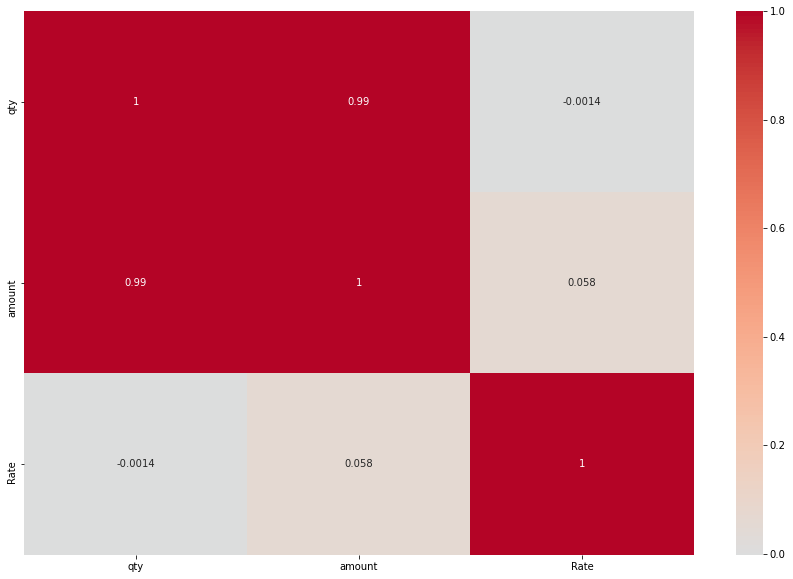

In [360]:
#creating a heatmap for correlation
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm', center = 0)

# Step 4 - Creating Historgrams/Box Plots for Anomaly Detection

- This will help us, identify:
    - Anomalies
    - Skews of the data
    - Pain Areas of the business
    - Will also explain if we dealt with the missing values in the right way or not

## Sheet 1 - Customer Ledger

<AxesSubplot:xlabel='Amount', ylabel='Density'>

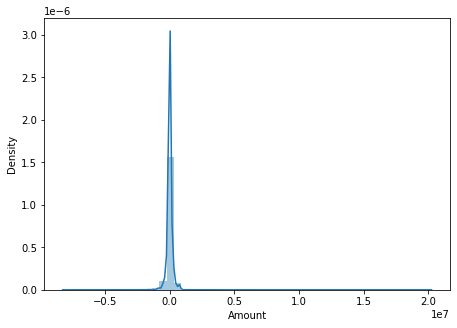

In [369]:
#looking at the disrubtion curve
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Amount'])

<AxesSubplot:xlabel='Amount'>

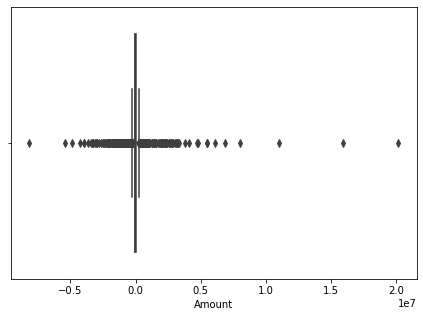

In [370]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df1['Amount'])

- what we can do instead is print out the description of the outliers to have more insights on our data. To understand the box plot further

In [374]:
df1.loc[df1['Amount'] > 100000]

,TranNo,TranDate,CustomerID,CustomerTitle,Amount,TranType,TranOrder,DestinationRefNo
25,1819-000757,01/02/2019,1656,Abid Chemical Fsb,145000.000,Invoice,4,12
27,1920-002397,19/03/2020,1656,Abid Chemical Fsb,150000.000,Invoice,4,12
29,CDN1819-000006,30/11/2018,1657,Al Habib CHICKEN,355076.000,DrNote,4,13
34,1819-000686,25/01/2019,1657,Al Habib CHICKEN,214750.000,Invoice,4,13
35,1819-000716,29/01/2019,1657,Al Habib CHICKEN,145000.000,Invoice,4,13
...,...,...,...,...,...,...,...,...
28961,2122-003372,22/02/2022,8301,Shakeel Traders Faisalabad,255000.000,Invoice,4,527
28967,2122-003396,23/02/2022,8517,Elemensis General Trading LLc,772119.625,Invoice,4,529
28969,2122-003681,28/02/2022,8543,Anus Bread Crumbs wastage,172800.000,Invoice,4,530
28971,2122-003848,24/03/2022,8580,wali & Co. scrape,189700.000,Invoice,4,531


- Offering credit to customers indicates that you respect and trust them to pay their bills before their due dates. Customers will reward these gestures of confidence by continuing to buy from you. This means that the anomalies are good in this case

## Sheet 3 - Customer Wise

- Gross Amount           
- Net Amount          

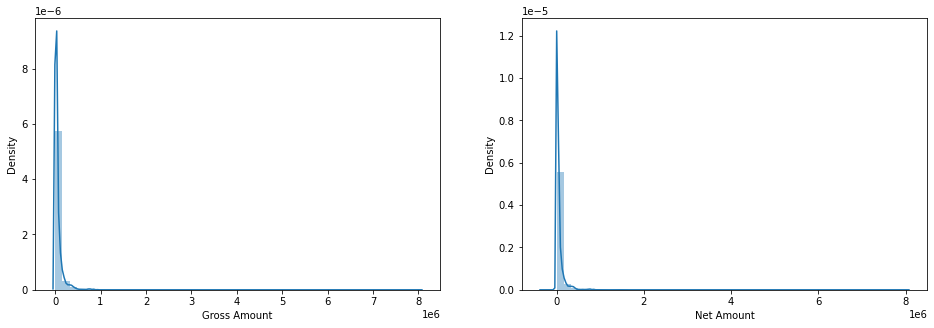

In [379]:
#looking at the disrubtion curve
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df3['Gross Amount'])
plt.subplot(1,2,2)
sns.distplot(df3['Net Amount'])
plt.show()

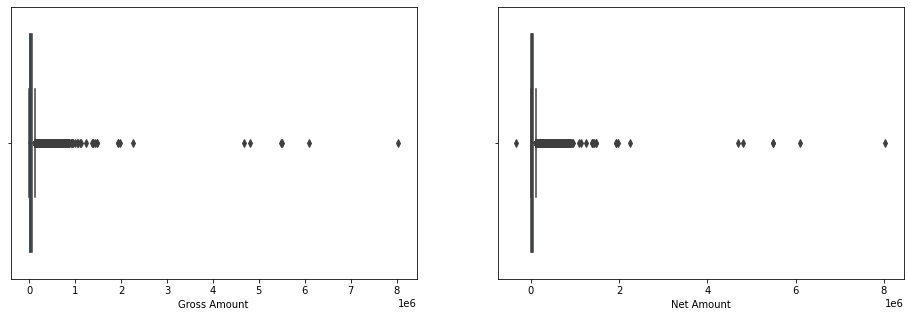

In [380]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df3['Gross Amount'])
plt.subplot(1,2,2)
sns.boxplot(df3['Net Amount'])
plt.show()

- Again anomlaies here are good for the company

## Sheet 5 - Purchase

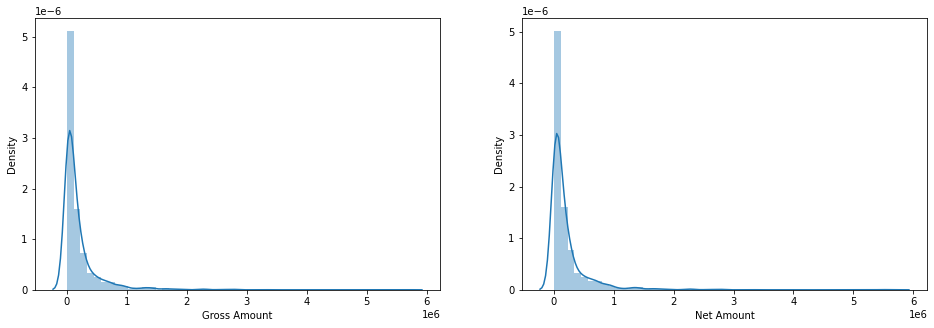

In [381]:
#looking at the disrubtion curve
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df6['Gross Amount'])
plt.subplot(1,2,2)
sns.distplot(df6['Net Amount'])
plt.show()

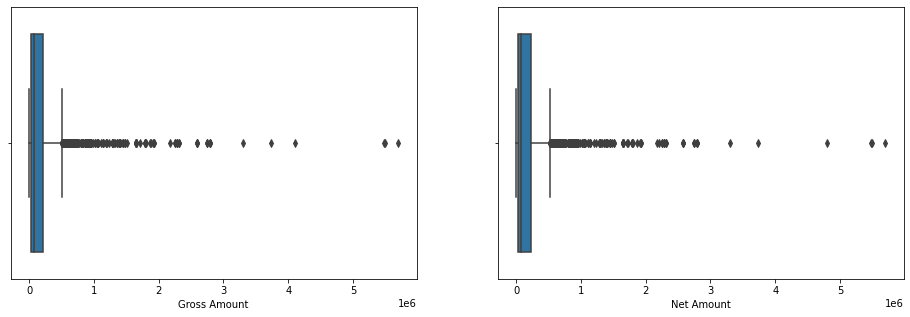

In [382]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df6['Gross Amount'])
plt.subplot(1,2,2)
sns.boxplot(df6['Net Amount'])
plt.show()

## Sheet 6 - DataDump4


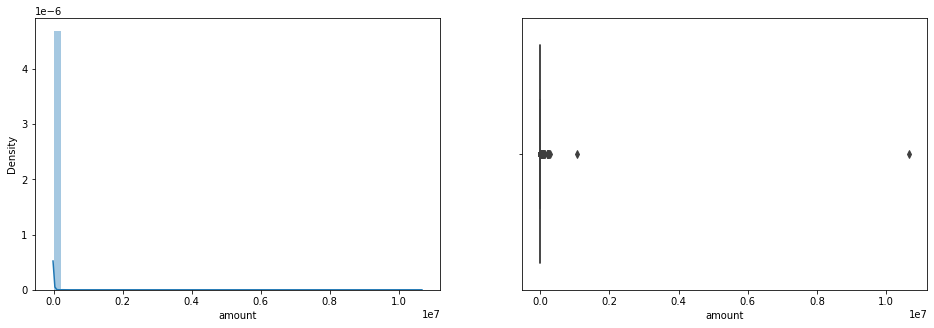

In [385]:
#looking at the disrubtion curve
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df4['amount'])
plt.subplot(1,2,2)
sns.boxplot(df4['amount'])
plt.show()

### Step 4a: Downloading Cleaned Data

In [386]:
df1.to_csv('Cleaned_CustomerLedger.csv', index=False)
df2.to_csv('Cleaned_Customer.csv', index=False)
df3.to_csv('Cleaned_CustomerWise.csv', index=False)
df4.to_csv('Cleaned_DataDump.csv', index=False)
df5.to_csv('Cleaned_Item.csv', index=False)
df6.to_csv('Cleaned_Purchase.csv', index=False)

# Step 5 Wrangling Analysis

### - What have we gathered about the data so far?

- KPIS and Diminsions, we have also identified which sheets have KPIs and which are more rich in dimensions 
- Correlation between columns and the data sheets since many have similar columns
- Anomalies in the data exist which is benefical considering there is a right skew in the data.
- values present in the data
- We also fixed missing value problems and extracted the columns vital for analysis
- Most of the potential KPIs are skewed towards the right. This means that the smaller values occur in the data with higher frequency and the larger values occur with comparatively lesser frequency. This helps us identify pain areas of the business

Further insights will be give via PowerBI and the document 